#finding category str contains 

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
from pathlib import Path
import os 
import statsmodels.api as sm


In [86]:
#directing to the right file path
os.chdir("/Users/mac/Desktop/Data/JSON")
cwd = os.getcwd() 

In [87]:
#Opening the reviews,  resource: https://towardsdatascience.com/load-yelp-reviews-or-other-huge-json-files-with-ease-ad804c2f1537
review_df = []
r_dtypes = {"overall": np.float16, 
            "verified": np.int32, 
            "vote": np.int32,
            "reviewTime": np.int32,
            "reviewerID": np.int32,
            "asin": object,
            "reviewerName": object,
            "reviewText":object , 
            "summary": object,     
            "style": object, 
            "image": object, 
           }
with open("Luxury_Beauty.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=['unixReviewTime'],axis=1)
        review_df.append(reduced_chunk)
    
review_df = pd.concat(review_df, ignore_index=True)

#### Data Dictionary

To help us with our analysis, take some time to study the data dictionary below. 

Review Data 
- age (numeric)
- job (categorical)
- marital: marital status (categorical, note: 'divorced' means divorced or widowed)
- education (categorical)
- credit_in_default: has credit in default? (categorical)
- housing_loan: has housing loan? (categorical)
- personal_loan: has personal loan? (categorical)

Meta Data:
- last_contact_type: contact communication type (categorical)
- last_contact_month: last contact month of year (categorical)
- last_contact_day: last contact day of the week (categorical)
- last_contact_duration: last contact duration, in seconds (numeric)
- last_contact_duration_mins: last contact duration, in minutes (numeric)
- n_contacts_this_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


In [88]:
review_df.head(20)

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,image
0,2.0,3,1,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,NaN
1,5.0,14,1,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,NaN
2,5.0,NaN,1,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},NaN
3,5.0,NaN,1,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},NaN
4,5.0,NaN,1,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},NaN
5,5.0,NaN,1,"04 14, 2018",AXX5G4LFF12R6,B00004U9V2,Ralla,Ive used this lotion for many years. I try oth...,Ive used this lotion for many years. I try ...,{'Size:': ' 250 g'},NaN
6,5.0,NaN,1,"04 11, 2018",A7GUKMOJT2NR6,B00004U9V2,Lydia Speight,Works great for dry hands.,Five Stars,{'Size:': ' 3.5 oz.'},NaN
7,5.0,NaN,1,"04 11, 2018",A3FU4L59BHA9FY,B00004U9V2,Allen Semer,The best hand cream ever.,Made in the USA,{'Size:': ' 3.5 oz.'},NaN
8,5.0,NaN,1,"04 7, 2018",A1AMNMIPQMXH9M,B00004U9V2,Vets park,LOVE THIS SCENT!! But Crabtree and Evelyn mak...,Moistens and smells good,{'Size:': ' 3.5 oz.'},NaN
9,5.0,NaN,1,"04 6, 2018",A3DMBDTA8VGWSX,B00004U9V2,Cynthia P. Irving,Its a great moisturizer especially for gardners,Five Stars,{'Size:': ' 3.5 oz.'},NaN


In [89]:
#creating clean review_df
clean_review_df = pd.DataFrame()

In [90]:
clean_review_df = review_df.copy()

In [91]:
#splitting out Day month year from reviewtime
clean_review_df['reviewTime'] = review_df['reviewTime'].str.replace(",","")
clean_review_df[['Day','Month',"Year"]] = clean_review_df["reviewTime"].str.split(" ", expand = True)
clean_review_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,image,Day,Month,Year
0,2.0,3,1,06 15 2010,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,NaN,06,15,2010
1,5.0,14,1,01 7 2010,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,NaN,01,7,2010
2,5.0,NaN,1,04 18 2018,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},NaN,04,18,2018
3,5.0,NaN,1,04 18 2018,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},NaN,04,18,2018
4,5.0,NaN,1,04 17 2018,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},NaN,04,17,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574623,5.0,NaN,1,03 20 2017,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,NaN,NaN,03,20,2017
574624,5.0,NaN,1,10 26 2016,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,NaN,NaN,10,26,2016
574625,5.0,NaN,1,09 30 2016,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,NaN,NaN,09,30,2016
574626,1.0,2,1,12 5 2016,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,"{'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}",NaN,12,5,2016


In [92]:
#separating columns of clean_review_df
clean_review_df[['Day','Month',"Year"]] = clean_review_df["reviewTime"].str.split(" ", expand = True)
clean_review_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,image,Day,Month,Year
0,2.0,3,1,06 15 2010,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,NaN,06,15,2010
1,5.0,14,1,01 7 2010,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,NaN,01,7,2010
2,5.0,NaN,1,04 18 2018,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},NaN,04,18,2018
3,5.0,NaN,1,04 18 2018,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},NaN,04,18,2018
4,5.0,NaN,1,04 17 2018,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},NaN,04,17,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574623,5.0,NaN,1,03 20 2017,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,NaN,NaN,03,20,2017
574624,5.0,NaN,1,10 26 2016,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,NaN,NaN,10,26,2016
574625,5.0,NaN,1,09 30 2016,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,NaN,NaN,09,30,2016
574626,1.0,2,1,12 5 2016,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,"{'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}",NaN,12,5,2016


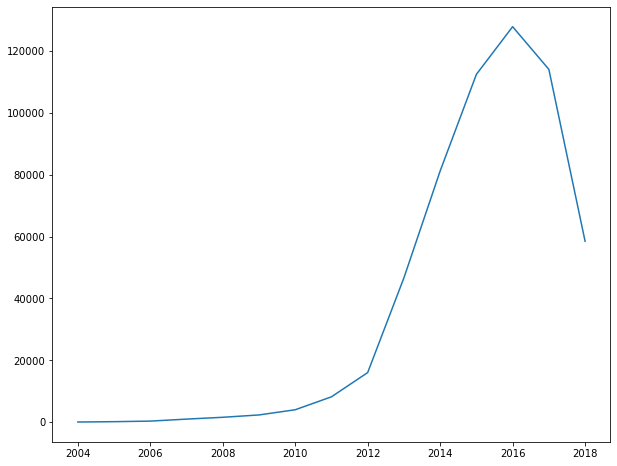

In [24]:
#Looking at number of reviews over the years 
plt.figure(figsize=(10,8))
clean_review_df['Year'].value_counts().sort_index().plot()
plt.show()

In [93]:
clean_review_df["style"].fillna(0)

0                                                         0
1                                                         0
2                                     {'Size:': ' 3.5 oz.'}
3                                     {'Size:': ' 3.5 oz.'}
4                                     {'Size:': ' 3.5 oz.'}
                                ...                        
574623                                                    0
574624                                                    0
574625                                                    0
574626    {'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}
574627    {'Size:': ' 3.4 Fluid Ounce', 'Color:': ' Multi'}
Name: style, Length: 574628, dtype: object

In [94]:
clean_review_df = pd.concat([clean_review_df,clean_review_df["style"].apply(pd.Series)], axis=1)
clean_review_df

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,style,...,Scent:,Style:,Style Name:,Scent Name:,Package Quantity:,Flavor:,Package Type:,Design:,Item Package Quantity:,SCENT:
0,2.0,3,1,06 15 2010,A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,14,1,01 7 2010,A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5.0,NaN,1,04 18 2018,A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,{'Size:': ' 3.5 oz.'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,1,04 18 2018,A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,{'Size:': ' 3.5 oz.'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,NaN,1,04 17 2018,A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,{'Size:': ' 3.5 oz.'},...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574623,5.0,NaN,1,03 20 2017,AHYJ78MVF4UQO,B01HIQEOLO,Lori Fox,Great color and I prefer shellac over gel,Five Stars,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574624,5.0,NaN,1,10 26 2016,A1L2RT7KBNK02K,B01HIQEOLO,Elena,Best shellac I have ever used. It doesn't tak...,Best shellac I have ever used,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574625,5.0,NaN,1,09 30 2016,A36MLXQX9WPPW9,B01HIQEOLO,Donna D. Harris,Great polish and beautiful color!!,Great polish!,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574626,1.0,2,1,12 5 2016,A23DRCOMC2RIXF,B01HJ2UY0W,Y.Y. Chen,"The perfume is good, but the spray head broke ...",Spray head broke off within a month,"{'Size:': ' 1.7 Fluid Ounce', 'Color:': ' Multi'}",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
#removing columns with null values greater than 80%https://stackoverflow.com/questions/43311555/how-to-drop-column-according-to-nan-percentage-for-dataframe 
clean_review_df = clean_review_df.loc[:, clean_review_df.isnull().mean() < .8]

In [107]:
clean_review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       574628 non-null  float16
 1   verified      574628 non-null  int32  
 2   reviewTime    574628 non-null  object 
 3   reviewerID    574628 non-null  object 
 4   asin          574628 non-null  object 
 5   reviewerName  574597 non-null  object 
 6   reviewText    574228 non-null  object 
 7   summary       574445 non-null  object 
 8   Day           574628 non-null  object 
 9   Month         574628 non-null  object 
 10  Year          574628 non-null  object 
 11  Size:         139834 non-null  object 
dtypes: float16(1), int32(1), object(10)
memory usage: 47.1+ MB


In [108]:
nan_count = clean_review_df.isna().sum()
print(nan_count )

overall              0
verified             0
reviewTime           0
reviewerID           0
asin                 0
reviewerName        31
reviewText         400
summary            183
Day                  0
Month                0
Year                 0
Size:           434794
dtype: int64


In [44]:
#unique product values 
unique_asin = clean_review_df["asin"].nunique()
print(unique_asin)

12120


There are 12,120 unique asins in the data set. 

In [43]:
#calculating value counts
clean_review_df["asin"].value_counts()

B0013U0EYI    6954
B00172O9NO    6138
B00176GSEI    5262
B0017SWIU4    4300
B0002ZW5UQ    3460
              ... 
B00870G0BI       1
B00A7HYQY2       1
B00K7LW8KC       1
B000JTSG9E       1
B01HJ2UY1G       1
Name: asin, Length: 12120, dtype: int64

In [ ]:
#histogram of reviews 
binwidth = 100

plt.figure(figsize=(10,8))
asin_data = clean_review_df["asin"] 
plt.hist(asin_data , bins=np.arange(0,7000, binwidth))

plt.xlabel(f'Review count. Bin Width: {binwidth}')
plt.ylabel('Frequency')
plt.title('Distribution of Review counts in dataset')
plt.show()

- consider removing products with value counts less than a certain amount. 

In [109]:
clean_review_df = clean_review_df[clean_review_df.duplicated()]

In [97]:
clean_review_df.shape

(574628, 28)

In [110]:
clean_review_df.duplicated().sum()

1498

In [111]:
#calculating % of duplicates
clean_review_df.duplicated().sum() / clean_review_df.shape[0] *100

4.288331615710524

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   overall       574628 non-null  float16
 1   verified      574628 non-null  int32  
 2   reviewTime    574628 non-null  object 
 3   reviewerID    574628 non-null  object 
 4   asin          574628 non-null  object 
 5   reviewerName  574597 non-null  object 
 6   reviewText    574228 non-null  object 
 7   summary       574445 non-null  object 
 8   style         251013 non-null  object 
 9   Day           574628 non-null  object 
 10  Month         574628 non-null  object 
 11  Year          574628 non-null  object 
dtypes: float16(1), int32(1), object(10)
memory usage: 47.1+ MB


In [46]:
#Removing unnecessary columns Style, Vote and Image
clean_review_df.drop(columns=["vote","image"] ,inplace=True, axis=1)

KeyError: "['vote', 'image'] not found in axis"

In [ ]:
review_df.info()

In [ ]:
#Shape of Review data 
review_df.shape

In [ ]:
#Opening the Meta data 
metadata_df = []
r_dtypes = {"category": object,
            "tech1": object,
            "description": object,
            "fit": object,
            "title": object,
            "also_buy": list,
            "tech2": object, 
            "brand": object,
            "feature": object,
            "rank":object,
            "also_view": list, 
            "details": object,
            "Shipping Weight": object,
            'International Shipping': object,
            "ASIN": object, 
            "Item model number": object,
            "main_cat": object,
            "similar_item": object,
            "date": object,
            "price": np.float32,
            "asin": object, 
            "imageURL": list, 
            "imageURLHighRes": list ,
           }
with open("meta_Luxury_Beauty.json", "r") as f:
    reader = pd.read_json(f, orient="records", lines=True, 
                          dtype=r_dtypes, chunksize=1000)
        
    for chunk in reader:
        reduced_chunk = chunk.drop(columns=["asin"],axis=1)
        metadata_df.append(reduced_chunk)
    
metadata_df = pd.concat(metadata_df, ignore_index=True)

In [ ]:
metadata_df.head(10)

In [ ]:
metadata_df.info()

In [ ]:
metadata_df.sample(10)